In [28]:
# importing pachages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Sequence


In [141]:
CONST_D = 1
CONST_M = 2 
CONST_MUS = [0.5, 1.5]
scale = 1

def basis(x: float):
    try: 
        assert len(x) == CONST_D
    except AssertionError:
        print('x is not scalar')
    pass

def identity_basis(x: float):
    return np.array([1, x])

def gaussian_basis(x: float, mus: Sequence[float] = CONST_MUS, scale: float = scale) -> np.array:
    return np.append([1], np.exp(-(np.array(x) - np.array(mus))**2 / (2*scale)))
    
def func_y(x, w_vec, basis: Callable = None):
    if basis is None:
        basis = identity_basis
    # return np.dot(x, w_vec) + w_0
    return np.dot(basis(x), w_vec)

basis(np.array([1, 2]))
func_y(2, [1, 0.5])

x is not scalar


np.float64(2.0)

In [142]:
x_n = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
t_n = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])

w_0 = 0
w_1 = 1
w_2 = 1
w_vec = [w_0, w_1, w_2]

func_y(2, w_vec, basis=gaussian_basis)

np.float64(1.2071493699429452)

In [143]:

# x_n.shape
x_vals = np.linspace(0, 2, 20)
w_0 = 0.4
w_1 = 1.5

y_vals = [func_y(x, [w_0, w_1]) for x in x_vals]


In [144]:
def gaussian(x, mu, sigma_2):
    return 1/np.sqrt(sigma_2*2*np.pi) * np.exp(-(x - mu)**2 / 2 * sigma_2)

gaussian(0.5, 0, 1)

np.float64(0.3520653267642995)

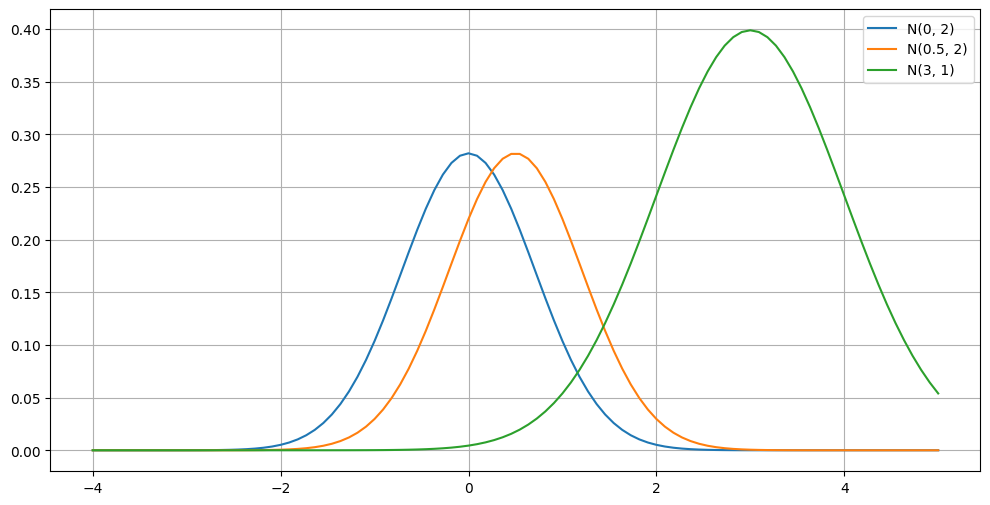

In [145]:

def plot_gaussian(means, vars):
    plt.figure(figsize=(12, 6))
    x_vals = np.linspace(-4, 5, 100)
    for mean, var in zip(means, vars):
        y_vals = np.array([gaussian(x, mean, var) for x in x_vals])
        plt.plot(x_vals, y_vals, label = f"N({mean}, {var})")
    plt.grid()
    plt.legend()
    plt.show()

plot_gaussian([0, 0.5, 3], [2, 2, 1])

In [157]:
def likelihood_func(t_vec: Sequence[float], x_vals: Sequence[float], w_vec: Sequence[float], sigma_2: float):
    products = 1
    for t, x in zip(t_vec, x_vals):
        products *= gaussian(t, func_y(x, w_vec, gaussian_basis), sigma_2)
    return products

def log_likelihood(t_vec: Sequence[float], x_vals: Sequence[float], w_vec: Sequence[float], sigma_2: float):
    sum = 0
    CONST_N = len(t_vec)
    for t, x in zip(t_vec, x_vals):
        sum += (t - func_y(x, w_vec, gaussian_basis))**2/2
    return (-CONST_N/2)*(np.log(sigma_2) + np.log(2*np.pi)) - sum/sigma_2

def plot_model(x_n, t_n, w_vec, sigma):    
    print(f"Likelihood: {likelihood_func(t_n, x_n, w_vec, sigma)} "
          f"\nlog-likelihood: {log_likelihood(t_n, x_n, w_vec, sigma):.5f}")
    plt.figure(figsize=(12, 6))
    plt.scatter(x_n, t_n, label='True Values')
    x_vals = np.linspace(0, 2, 50)
    y_vals = np.array([func_y(x, w_vec, gaussian_basis) for x in x_vals])
    y_vals1 = np.array([func_y(x, [w_vec[0], 0, 0], gaussian_basis) for x in x_vals])
    y_vals2 = np.array([func_y(x, [0, w_vec[1], 0], gaussian_basis) for x in x_vals])
    y_vals3 = np.array([func_y(x, [0, 0, w_vec[2]], gaussian_basis) for x in x_vals])
    plt.plot(x_vals, y_vals, label='Model', color='red')
    plt.plot(x_vals, y_vals1, label='const function', color='blue')
    plt.plot(x_vals, y_vals2, label='Gaussian 1', color='green')
    plt.plot(x_vals, y_vals3, label='Gaussian 2', color='purple')
    plt.grid()
    plt.legend()
    plt.show()


Likelihood: 2.347239998516118e-09 
log-likelihood: -19.87003


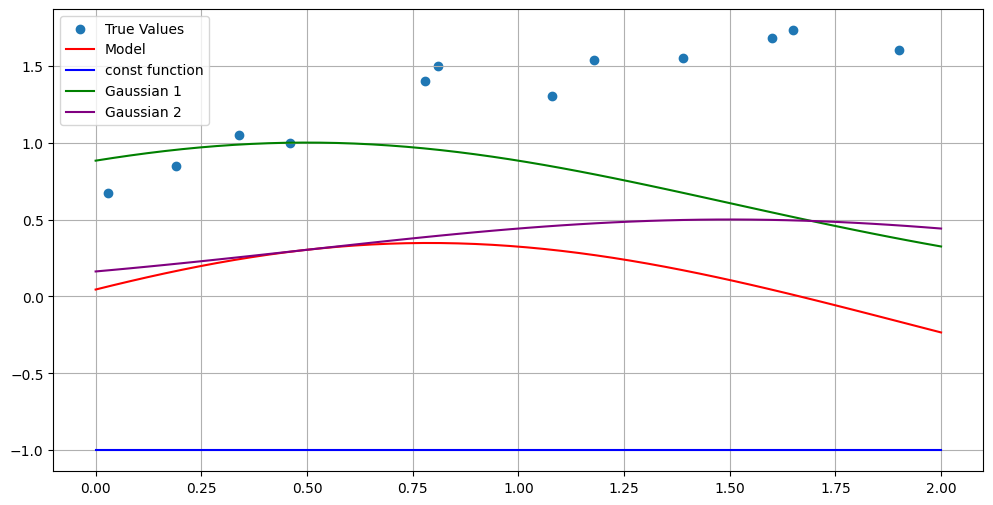

In [160]:
w_0 = -1
w_1 = 1
w_2 = 0.5
w_vec = [w_0, w_1, w_2]
plot_model(x_n, t_n, w_vec, 1)

Likelihood: 1.4289145020102253e-05 
log-likelihood: -11.15601


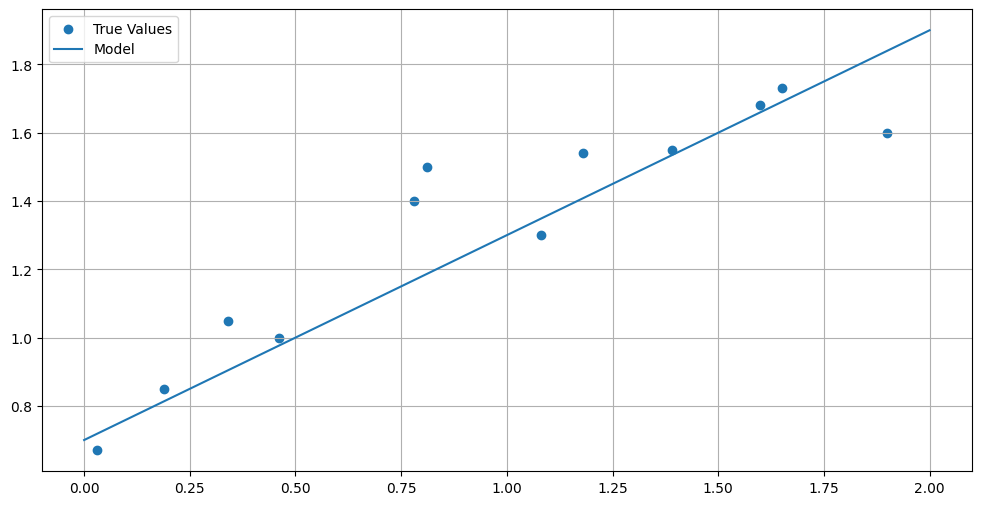

In [ ]:

w_0 = 0.7
w_1 = 0.6
w_vec = [w_0, w_1]; sigma = 1

plot_model(x_n, t_n, w_vec, sigma)